In [ ]:
!git clone https://github.com/AshishJangra27/datasets

fatal: destination path 'datasets' already exists and is not an empty directory.


### 📚 Sample of Book Metadata

Below is a snapshot of book metadata used for analysis, including title, author, category, publish year, and user engagement metrics:

| title                                | author                   | category             | publish_year | want_to_read | currently_reading | have_read | reviews |
|--------------------------------------|--------------------------|----------------------|--------------|--------------|-------------------|-----------|---------|
| Federal Income Taxation 1995         | W. C. Stevenson          | business__economics  | 1995         | 0            | 0                 | 0         | 0       |
| Office Supply in Colombia            | The Office Supplies      | business__economics  | 2005         | 0            | 0                 | 0         | 0       |
| Cases for Use With Foundations...    | Stanley B. Block         | business__economics  | 1996         | 0            | 0                 | 0         | 10      |
| Working Papers, Vol. 1               | Thomas Dyckman           | business__economics  | 1997         | 0            | 0                 | 0         | 0       |
| Cps Accounting Principles & Finance  | Robert N. Anthony        | business__economics  | 1997         | 0            | 0                 | 0         | 0       |
| First Course in Business Analysis    | V.J. Seddon              | business__economics  | 1988         | 0            | 0                 | 0         | 0       |
| The Night Before Christmas           | Clement Clarke Moore     | cats                 | 1857         | 91           | 4                 | 27        | 122     |
| The Cat in the Hat                   | Dr. Seuss                | cats                 | 1957         | 680          | 41                | 139       | 860     |
| Tale of Mr. Jeremy Fisher            | Beatrix Potter           | cats                 | 1906         | 8            | 1                 | 5         | 14      |

### 📊 Data Analysis Project Questions

#### 🔍 Exploratory Analysis
1. **What are the most common book categories in the dataset?**
2. **Which authors have published the most books?**

#### 📅 Temporal Trends
3. **How has book publishing evolved over the years?**
4. **Which years saw the highest number of book publications?**

#### 📈 User Engagement
5. **What percentage of books have never been read, marked as 'Want to read', or 'Currently reading'?**
6. **Are newer books more likely to be marked as 'Want to read' compared to older books?**

#### 🧩 Data Quality & Completeness
7. **How much missing data exists across columns like `author`, `descriptions`, and `publish_year`?**
8. **Do books missing cover images (`cover_url`) share any common patterns (e.g., by year or category)?**


In [ ]:
main_df.head(20)

,title,author,category,publish_year,title_id,author_id,title_id_length,want_to_read,currently_reading,have_read,reviews
2181,Federal Income Taxation 1995,W. C. Stevenson,business__economics,1995,OL10499247M,/authors/OL2648825A/W._C._Stevenson,11,0,0,0,0
2194,Office Supply in Colombia,The Office Supplies,business__economics,2005,OL10674917M,/authors/OL3484018A/The_Office_Supplies,11,0,0,0,0
2202,Cases for Use With Foundations of Financial Ma...,Stanley B. Block,business__economics,1996,OL10232281M,/authors/OL530173A/Stanley_B._Block,11,0,0,0,0
2203,"Working Papers,Volume 1 To Accompany Intermedi...",Thomas Dyckman,business__economics,1997,OL10233179M,/authors/OL3353708A/Thomas_Dyckman,11,0,0,0,0
2204,Cps Accounting Principles & Finance,Robert N. Anthony,business__economics,1995,OL10235681M,/authors/OL2635607A/Robert_N._Anthony,11,0,0,0,0
2205,First Course in Business Analysis,V.J. Seddon,business__economics,1988,OL10320095M,/authors/OL3389557A/V.J._Seddon,11,0,0,0,0
3360,The Night Before Christmas,Clement Clarke Moore,cats,1857,OL655908W,/authors/OL51027A/Clement_Clarke_Moore,9,91,4,27,122
3361,The Cat in the Hat,Dr. Seuss,cats,1957,OL1898309W,/authors/OL2622837A/Dr._Seuss,10,680,41,139,860
3362,Tale of Mr. Jeremy Fisher,Beatrix Potter,cats,1906,OL11553363W,/authors/OL32541A/Beatrix_Potter,11,8,1,5,14
3363,The Tailor of Gloucester,Beatrix Potter,cats,1903,OL108770W,/authors/OL32541A/Beatrix_Potter,9,11,1,9,21


In [ ]:
import os
import pandas as pd
from tqdm.auto import tqdm

### 1. Combining the Dataset

In [ ]:
csv_files = os.listdir('/content/datasets/OpenBook')

main_df_list = []

for csv_file in tqdm(csv_files):

  file_path = 'datasets/OpenBook/' + csv_file

  df = pd.read_csv(file_path)

  main_df_list.append(df)

main_df = pd.concat(main_df_list, ignore_index=True)

  0%|          | 0/141 [00:00<?, ?it/s]

### 2. Data Exploration

In [ ]:
main_df.head()

,title,author,category,publish_year,title_id,author_id,cover_url,book_stats,descriptions,reading_stats
0,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368183M,NaN,//covers.openlibrary.org/b/olid/OL10368183M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
1,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368555M,NaN,/images/icons/avatar_book-sm.png,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
2,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368327M,NaN,//covers.openlibrary.org/b/olid/OL10368327M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
3,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368345M,NaN,//covers.openlibrary.org/b/olid/OL10368345M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
4,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368762M,NaN,//covers.openlibrary.org/b/olid/OL10368762M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read


#### 2.1) Checking Null Values

In [ ]:
main_df.isnull().sum()

,0
title,1
author,65295
category,0
publish_year,9813
title_id,0
author_id,64833
cover_url,0
book_stats,3822
descriptions,2780
reading_stats,2780


#### 2.2) Checking Duplicate Values

In [ ]:
main_df['title_id'].nunique()

1329060

#### 2.3) Explore each column

### 3. Data Cleaning

In [ ]:
main_df.head()

,title,author,category,publish_year,title_id,author_id,cover_url,book_stats,descriptions,reading_stats
0,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368183M,NaN,//covers.openlibrary.org/b/olid/OL10368183M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
1,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368555M,NaN,/images/icons/avatar_book-sm.png,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
2,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368327M,NaN,//covers.openlibrary.org/b/olid/OL10368327M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
3,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368345M,NaN,//covers.openlibrary.org/b/olid/OL10368345M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
4,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368762M,NaN,//covers.openlibrary.org/b/olid/OL10368762M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read


#### 3.1) Remove Null Values

In [ ]:
main_df.dropna(inplace = True)

#### 3.2) Remove Duplicates

In [ ]:
main_df = main_df.drop_duplicates(subset = 'title_id')

#### 3.3) Clean Year column and save years as s number

In [ ]:
main_df['publish_year'] = main_df['publish_year'].str.replace('First published in ','').astype(int)

main_df	 = main_df[main_df['publish_year'] > 1000]
main_df	 = main_df[main_df['publish_year'] < 2025]

#### 3.4) Clean ID Column by remove /works/

In [ ]:
 main_df['title_id_length'] = main_df['title_id'].str.split('/').str[-1].str.split('?').str[0].str.len()

In [ ]:
main_df['title_id'] = main_df['title_id'].str.split('/').str[-1].str.split('?').str[0]

In [ ]:
main_df[main_df['title_id_length'] == 17]

,title,author,category,publish_year,title_id,author_id,cover_url,book_stats,descriptions,reading_stats,title_id_length
590742,"Psmith, Journalist",P. G. Wodehouse,humor,2021,psmith-journalist,/authors/OL9461489A/P._G._Wodehouse,//covers.openlibrary.org/b/olid/OL37044580M-M.jpg,Publish Date 2021|Publisher Standard Ebooks|L...,Growing bored while accompanying his Cambridge...,0 Want to read|0 Currently reading|0 Have read,17
698649,Enormous Room,E. E. Cummings,historical_fiction,1949,the-enormous-room,/authors/OL7896048A/E._E._Cummings,//covers.openlibrary.org/b/olid/OL30520007M-M.jpg,Publish Date 2021|Publisher Standard Ebooks|L...,"In Great War–era France, E. E. Cummings is lif...",1 Want to read|0 Currently reading|0 Have read,17


In [ ]:
main_df['title_id_length'].unique()

array([11,  9, 10,  8, 28, 41, 26, 21, 23, 13, 22, 27,  7, 14, 24, 30, 12,
        4, 15, 16, 19, 20, 17, 18, 25, 45])

<Axes: xlabel='title_id_length'>

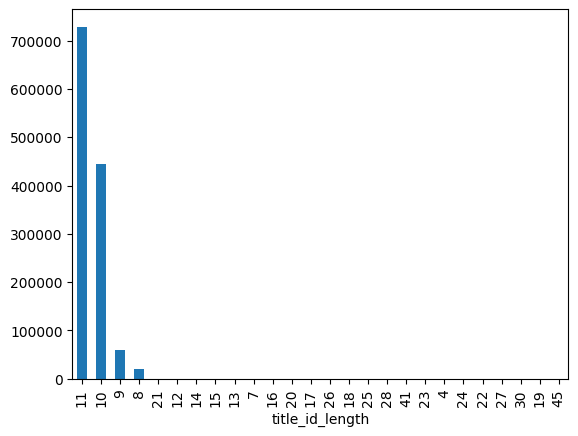

In [ ]:
main_df['title_id_length'].value_counts().plot(kind = 'bar')

In [ ]:
main_df['want_to_read'] = main_df['reading_stats'].str.split('|').str[0].str.split(' ').str[0].astype(int)
main_df['currently_reading'] = main_df['reading_stats'].str.split('|').str[1].str.split(' ').str[0].astype(int)
main_df['have_read'] = main_df['reading_stats'].str.split('|').str[2].str.split(' ').str[0].astype(int)

In [ ]:
main_df.head()

,title,author,category,publish_year,title_id,author_id,cover_url,book_stats,descriptions,reading_stats,title_id_length,want_to_read,currently_reading,have_read
2181,Federal Income Taxation 1995,W. C. Stevenson,business__economics,1995,OL10499247M,/authors/OL2648825A/W._C._Stevenson,/images/icons/avatar_book-sm.png,Publish Date January 1995|Publisher South-Wes...,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,11,0,0,0
2194,Office Supply in Colombia,The Office Supplies,business__economics,2005,OL10674917M,/authors/OL3484018A/The_Office_Supplies,//covers.openlibrary.org/b/olid/OL10674917M-M.jpg,"Publish Date September 30, 2005|Publisher Ico...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,11,0,0,0
2202,Cases for Use With Foundations of Financial Ma...,Stanley B. Block,business__economics,1996,OL10232281M,/authors/OL530173A/Stanley_B._Block,//covers.openlibrary.org/b/olid/OL10232281M-M.jpg,Publish Date June 1996|Publisher Richard D Irwin,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,11,0,0,0
2203,"Working Papers,Volume 1 To Accompany Intermedi...",Thomas Dyckman,business__economics,1997,OL10233179M,/authors/OL3353708A/Thomas_Dyckman,/images/icons/avatar_book-sm.png,"Publish Date August 1, 1997|Publisher Mcgraw-...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,11,0,0,0
2204,Cps Accounting Principles & Finance,Robert N. Anthony,business__economics,1995,OL10235681M,/authors/OL2635607A/Robert_N._Anthony,/images/icons/avatar_book-sm.png,Publish Date August 1995|Publisher Richard D ...,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,11,0,0,0


In [ ]:
del main_df['book_stats']
del main_df['descriptions']
del main_df['cover_url']
del main_df['reading_stats']

### 4. Data Analysis

#### 4.1) What are the most common book categories in the dataset?

In [ ]:
import plotly.express as px

# Calculate the top 10 most common categories
top_categories = main_df['category'].value_counts().head(20).reset_index()
top_categories.columns = ['category', 'count']

# Create the interactive horizontal bar chart
fig = px.bar(top_categories,
             x='count',
             y='category',
             orientation='h', # Make it horizontal
             title='Top 20 Most Common Book Categories',
             color_discrete_sequence=px.colors.sequential.Blues_r, # Use blue color palette, reversed for darker bars at the top
             template='plotly_white' # Start with a clean template
             )

# Update layout for minimalistic look and monospace font
fig.update_layout(
    font_family='monospace',
    title_font_family='monospace',
    xaxis_title_font_family='monospace',
    yaxis_title_font_family='monospace',
    plot_bgcolor='white', # Ensure plot background is white
    margin=dict(l=0, r=1000, t=40, b=0) # Adjust margins
)

fig.show()

#### 4.2) Which authors have published the most books?

In [ ]:
import plotly.express as px

# Calculate the top 15 most common authors based on the count of their books
top_authors = main_df['author'].value_counts().head(20).reset_index()
top_authors.columns = ['author', 'count']

# Create the interactive horizontal bar chart
fig = px.bar(top_authors,
             x='count',
             y='author',
             orientation='h', # Make it horizontal
             title='Top 20 Most Common Authors',
             color_discrete_sequence=px.colors.sequential.Blues_r, # Use blue color palette, reversed for darker bars at the top
             template='plotly_white' # Start with a clean template
             )

# Update layout for minimalistic look and monospace font
fig.update_layout(
    font_family='monospace',
    title_font_family='monospace',
    xaxis_title_font_family='monospace',
    yaxis_title_font_family='monospace',
    plot_bgcolor='white', # Ensure plot background is white
    margin=dict(l=0, r=700, t=40, b=0) # Adjust margins
)

fig.show()

#### 4.3) How has book publishing evolved over the years?

In [ ]:
import plotly.express as px

# Filter data for books published from 1700 onwards
yearly_counts = main_df[main_df['publish_year'] >= 1700]['publish_year'].value_counts().reset_index()
yearly_counts.columns = ['publish_year', 'count']
yearly_counts = yearly_counts.sort_values(by='publish_year')

# Create the interactive line chart
fig = px.line(yearly_counts,
              x='publish_year',
              y='count',
              title='Book Publishing Trend Over the Years (From 1700)',
              template='plotly_white' # Start with a clean template
             )

# Update layout for minimalistic look and monospace font
fig.update_layout(
    font_family='monospace',
    title_font_family='monospace',
    xaxis_title_font_family='monospace',
    yaxis_title_font_family='monospace',
    plot_bgcolor='white' # Ensure plot background is white
)

fig.show()

#### 4.4) What percentage of books have never been read, marked as 'Want to read', or 'Currently reading' or 'have_read?

In [ ]:
import plotly.express as px

# Calculate the number of books with and without reviews
review_counts = main_df['reviews'].apply(lambda x: 'With Reviews' if x > 0 else 'No Reviews').value_counts().reset_index()
review_counts.columns = ['Review Status', 'count']

# Create the interactive pie chart (donut chart)
fig = px.pie(review_counts,
             values='count',
             names='Review Status',
             title='Percentage of Books with and without Reviews',
             hole=0.4, # This creates the donut hole
             color_discrete_sequence=px.colors.sequential.Blues_r # Use blue color palette, reversed for darker bars at the top
             )

# Update layout for minimalistic look and monospace font
fig.update_layout(
    font_family='monospace',
    title_font_family='monospace',
    plot_bgcolor='white' # Ensure plot background is white
)

fig.show()

In [ ]:
less_then_2000_df = main_df[main_df['publish_year'] < 1950]


print(len(less_then_2000_df[less_then_2000_df['have_read'].astype(int) != 0]))
print(len(less_then_2000_df[less_then_2000_df['want_to_read'].astype(int) != 0]))
print(len(less_then_2000_df[less_then_2000_df['currently_reading'].astype(int) != 0]))

4681
17305
3183


In [ ]:
less_then_2000_df = main_df[main_df['publish_year'] > 1950]


print(len(less_then_2000_df[less_then_2000_df['have_read'].astype(int) != 0]))
print(len(less_then_2000_df[less_then_2000_df['want_to_read'].astype(int) != 0]))
print(len(less_then_2000_df[less_then_2000_df['currently_reading'].astype(int) != 0]))

61968
231281
31965


In [ ]:
import plotly.express as px

# Group by author and sum the reading stats
author_reading_stats = main_df.groupby('author')[['want_to_read', 'currently_reading', 'have_read']].sum().reset_index()

# Calculate the total reading counts for each author and get the top authors
author_reading_stats['total_reading'] = author_reading_stats['want_to_read'] + author_reading_stats['currently_reading'] + author_reading_stats['have_read']
top_authors_reading = author_reading_stats.sort_values(by='total_reading', ascending=False).head(10)

# Melt the dataframe to long format for stacked bar chart
top_authors_melted = top_authors_reading.melt(id_vars=['author', 'total_reading'],
                                             value_vars=['want_to_read', 'currently_reading', 'have_read'],
                                             var_name='Reading Status',
                                             value_name='count')

# Create the interactive stacked bar chart
fig = px.bar(top_authors_melted,
             x='count',
             y='author',
             color='Reading Status',
             orientation='h', # Make it horizontal
             title='Top 10 Authors by Total Reading Counts (Want to Read, Currently Reading, Have Read)',
             color_discrete_sequence=px.colors.sequential.Blues_r, # Use blue color palette, reversed for darker bars at the top
             template='plotly_white' # Start with a clean template
             )

# Update layout for minimalistic look and monospace font
fig.update_layout(
    font_family='monospace',
    title_font_family='monospace',
    xaxis_title_font_family='monospace',
    yaxis_title_font_family='monospace',
    plot_bgcolor='white', # Ensure plot background is white
    margin=dict(l=0, r=0, t=40, b=0) # Adjust margins
)

fig.show()

In [ ]:
main_df.groupby('author_id')['want_to_read'].sum().sort_values(ascending = False).head(10)

,want_to_read
author_id,
/authors/OL7315784A/Colleen_Hoover,56322
/authors/OL2162284A/Stephen_King,25526
/authors/OL23919A/J._K._Rowling,21653
/authors/OL236414A/Robert_Greene,20979
/authors/OL7422948A/James_Clear,17282
/authors/OL242220A/Robert_T._Kiyosaki,13256
/authors/OL35524A/R._L._Stine,10935
/authors/OL30765A/Rick_Riordan,10003
/authors/OL2832500A/Jeff_Kinney,8965


In [ ]:
main_df.groupby('author_id')['have_read'].sum().sort_values(ascending = False).head(10)

,have_read
author_id,
/authors/OL2162284A/Stephen_King,4522
/authors/OL23919A/J._K._Rowling,3635
/authors/OL666139A/Carole_Mortimer,2930
/authors/OL661093A/Penny_Jordan,2636
/authors/OL30765A/Rick_Riordan,2382
/authors/OL35524A/R._L._Stine,2336
/authors/OL18977A/Nora_Roberts,2310
/authors/OL27695A/Agatha_Christie,2294
/authors/OL25712A/Terry_Pratchett,2292


In [ ]:
main_df.groupby('author_id')['currently_reading'].sum().sort_values(ascending = False).head(10)

,currently_reading
author_id,
/authors/OL7315784A/Colleen_Hoover,2793
/authors/OL23919A/J._K._Rowling,1767
/authors/OL2162284A/Stephen_King,1550
/authors/OL236414A/Robert_Greene,1158
/authors/OL242220A/Robert_T._Kiyosaki,1143
/authors/OL7422948A/James_Clear,1045
/authors/OL30765A/Rick_Riordan,819
/authors/OL34184A/Roald_Dahl,727
/authors/OL2832500A/Jeff_Kinney,612


### 📊 Conclusion: Top 10 Authors by Total Reading Counts

- **Colleen Hoover** leads with the highest total reading interactions across all statuses (`want to read`, `currently reading`, and `have read`), indicating massive popularity and reader interest.
- **Stephen King** and **J.K. Rowling** rank next, with a notable portion of their books already **read**, showcasing strong completion rates and loyal readership.
- **James Clear**, **Robert Greene**, and **Robert T. Kiyosaki** have high `want to read` counts, pointing to widespread interest—likely driven by themes in productivity, psychology, and finance.
- **Roald Dahl** and **R. L. Stine** show a balanced distribution, reflecting consistent engagement across generations and reading stages.
- For most authors, the dominant category is `want to read`, suggesting a large number of readers plan to explore their books in the future.

> This data provides valuable insight into both current reading trends and upcoming interest in popular authors.
